# Hands-On

Você foi designado para realizar a limpeza e preparação de dados de dois conjuntos de dados (base1.csv e base2.csv) distintos que representam informações relacionadas a risco de crédito.

Seu objetivo é ler os dois conjuntos de dados usando a biblioteca Pandas, realizar a concatenação dos dados, lidar com valores duplicados e faltantes, além de verificar a presença de outliers nos dados combinados.

____

## Passos a serem seguidos:

1. **Leitura dos Arquivos:** Utilize a biblioteca Pandas para ler os dois arquivos de dados: 'base1.csv' e 'base2.csv', que estão no diretório datasets, no repositório do módulo.
2. **Concatenação dos Dados:** Concatene os dois conjuntos de dados em um único DataFrame, verificando se os dados possuem a mesma estrutura para uma concatenação adequada.
3. **Tratamento de Dados Duplicados:** Verifique se há linhas duplicadas no DataFrame combinado e remova-as, mantendo a primeira ocorrência.
4. **Tratamento de Valores Faltantes:** Identifique e lide com os valores faltantes no DataFrame combinado. Preencha os valores ausentes com estratégias apropriadas (média, mediana, valor específico etc.) dependendo do contexto dos dados.
5. **Verificação de Outliers:** Utilize métodos estatísticos ou gráficos (como boxplots) para identificar a presença de outliers nos dados. Considere se eles são significativos para a análise ou se precisam ser tratados de alguma forma.

In [1]:
import pandas as pd

In [2]:
#Leitura dos Arquivos

arquivo_base_1 = pd.read_csv("../Projetos_ADA/base1.csv").drop(columns=["Unnamed: 0.1","Unnamed: 0"])
arquivo_base_2 = pd.read_csv("../Projetos_ADA/base2.csv").drop(columns=["Unnamed: 0.1","Unnamed: 0"])

In [3]:
# Verificação se as bases possuem a mesma estrtura

if arquivo_base_2.shape[1] == arquivo_base_2.shape[1]:
   dados_unificados = pd.concat([arquivo_base_1,arquivo_base_2],ignore_index=True)
else:
    print("As tabelas não são do mesmo tamanho")

In [4]:
#Mostrando os dados concatenados na tela

dados_unificados

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,male,2,rent,NaN,NaN,2445,12,car,good
1,61,male,2,free,NaN,moderate,1239,18,education,good
2,50,male,2,rent,quite rich,NaN,1236,6,car,good
3,42,male,2,free,NaN,NaN,10477,36,car,good
4,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...
995,32,male,2,own,NaN,NaN,7238,48,radio/TV,good
996,38,male,2,free,NaN,moderate,6681,48,business,good
997,20,female,2,rent,NaN,NaN,4675,12,car,good
998,30,male,3,own,little,little,1823,24,radio/TV,bad


In [5]:
# Verificação se possuem dados duplicados

dados_unificados.duplicated().sum() #opção 1
dados_unificados.loc[dados_unificados.duplicated()] #opção 2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [6]:
# Verificação se possuem dados NAN

dados_unificados.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
# Alterando dados NAN para "Uninformed" e atualizando a base

dados_unificados.fillna(value="Uninformed",inplace=True)

In [8]:
#Verificando se o método funcionou

dados_unificados.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [9]:
# Mostrando base tratada

dados_unificados

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,male,2,rent,Uninformed,Uninformed,2445,12,car,good
1,61,male,2,free,Uninformed,moderate,1239,18,education,good
2,50,male,2,rent,quite rich,Uninformed,1236,6,car,good
3,42,male,2,free,Uninformed,Uninformed,10477,36,car,good
4,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...
995,32,male,2,own,Uninformed,Uninformed,7238,48,radio/TV,good
996,38,male,2,free,Uninformed,moderate,6681,48,business,good
997,20,female,2,rent,Uninformed,Uninformed,4675,12,car,good
998,30,male,3,own,little,little,1823,24,radio/TV,bad


In [10]:
import matplotlib.pyplot as plt

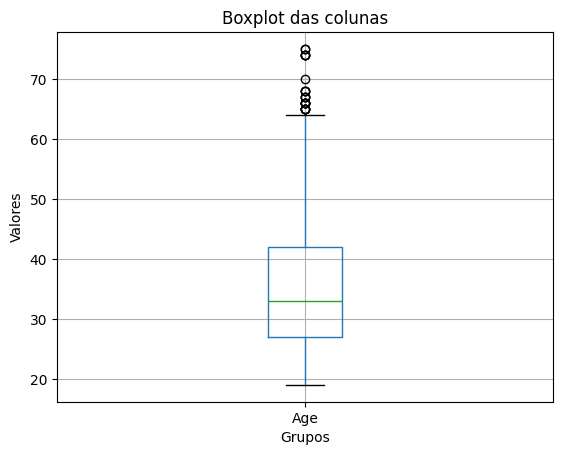

In [11]:
dados_unificados.boxplot('Age')
plt.title('Boxplot das colunas')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

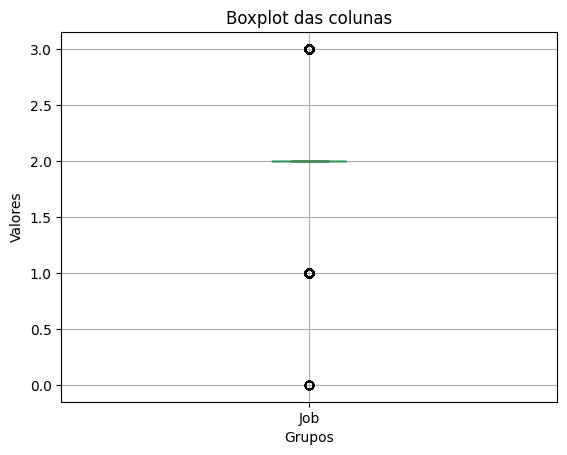

In [12]:
dados_unificados.boxplot('Job')
plt.title('Boxplot das colunas')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

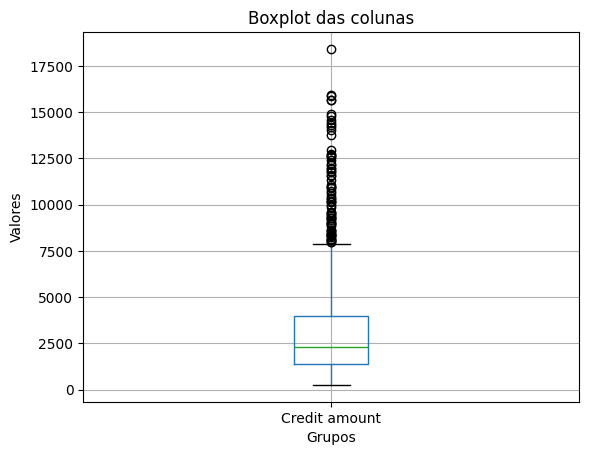

In [13]:
dados_unificados.boxplot('Credit amount')
plt.title('Boxplot das colunas')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

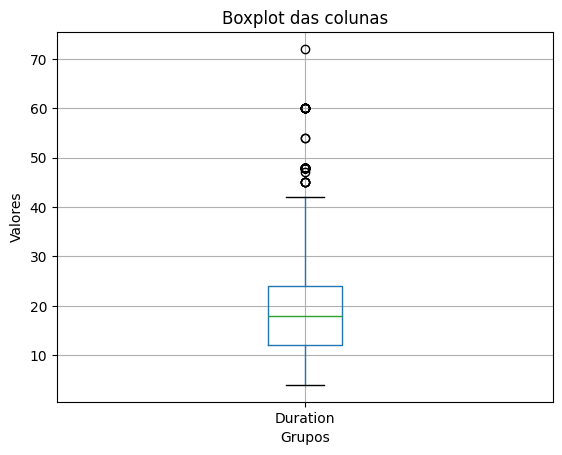

In [14]:
dados_unificados.boxplot('Duration')
plt.title('Boxplot das colunas')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

0 Age
1 Job
2 Credit amount
3 Duration


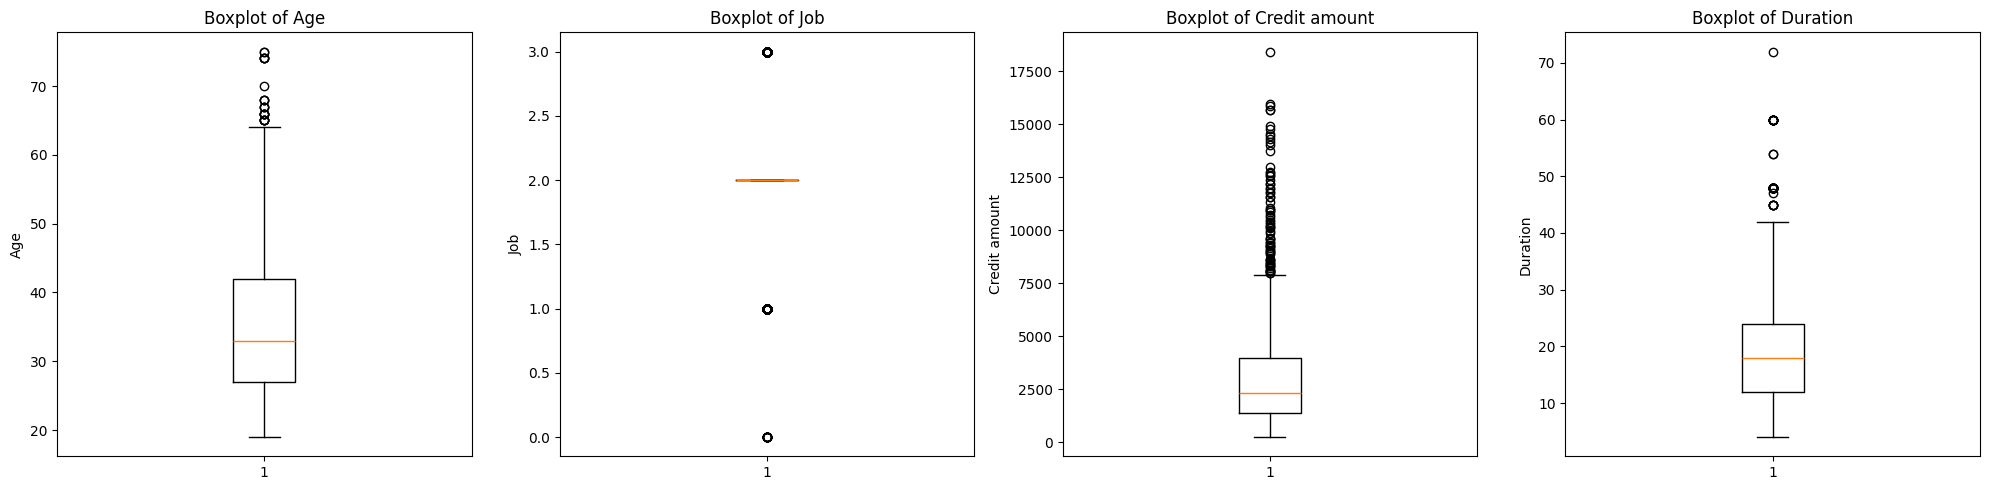

In [16]:


figura, eixo = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

colunas = ['Age', 'Job', 'Credit amount', 'Duration']

# Criando boxplots para cada coluna numérica
for i, coluna in enumerate(colunas):
    print(i,coluna)
    eixo[i].boxplot(dados_unificados[coluna])
    eixo[i].set_title(f'Boxplot of {coluna}')
    eixo[i].set_ylabel(coluna)

plt.tight_layout()
plt.show()

### Verificação de outliers na base:

*Coluna "Age":* --> Alguns outliers, mas podem ser valores válidos, por conta de idade mais altas.  
*Coluna "Job":* --> Não parece ter outliers significativos.  
*Coluna "Credit amount":* --> Vários outliers, indicando empréstimos com valores maiores comparando com a maioria.  
*Coluna "Duration":* --> Alguns outliers, devido durações de empréstimos mais longas.